## Multivariate Parametric and Nonparametric Density Estimation

# Multivariate Parametric Techniques
On the course website you will find a copy of the Pima Diabetes dataset – a commonly used dataset
for evaluating classification techniques. This dataset describes a two-class classification problem,
with 8 input features and 768 data points.
# Q1: Apply and evaluate quadratic discriminant analysis on the diabetes 

Details/hints:
→ Split the data into training (the first 500 points) and test (the remaining points) sets.
→ Fit the model using the training set.
→ Report (a) the training classification error; (b) the test classification error; (c) the model
parameters (mean vectors and covariance matrices). To calculate the classification error,
assume a decision threshold of 0.5 on the posterior probability values and then calculate the
“percentage correct” for the data set in question. Note this corresponds to a 0/1 loss
function after the decision threshold converts the prediction to a 0/1 output.



# (From Alp 5.4) Multivariate Normal Distribution:
In the multivariate case where x is d-dimensional and normal distributed,
we have
p(x) = 1/(2π)d/2|Σ|1/2 exp
−1/2(x − μ)T Σ−1(x − μ)
and we write x ∼ Nd(μ, Σ) where μ is the mean vector and Σ is the
covariance matrix

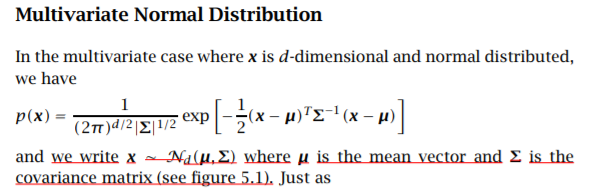

(From https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html)
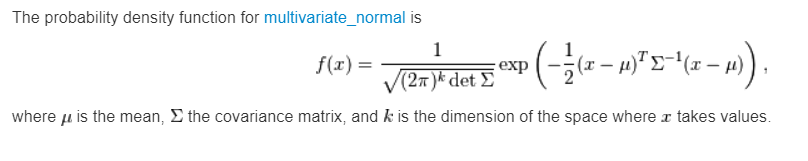

In [198]:
import pandas

In [199]:
pima_data = pandas.read_csv('pima_indians_diabetes.csv',)

In [167]:
pima_data_train = pima_data.loc[:499,:]

In [168]:
pima_data_test = pima_data.loc[500:,:]

In [169]:
from scipy.stats import multivariate_normal

In [171]:
pos_data = pima_data_train[pima_data_train['9']=='pos']

In [172]:
neg_data = pima_data_train[pima_data_train['9']=='neg']

In [173]:
mu1 = pos_data.mean()
mu2 = neg_data.mean()

In [174]:
S1 = pos_data.cov()
S2 = neg_data.cov()

In [175]:
norm1 = multivariate_normal(mu1,S1)

In [176]:
norm2 = multivariate_normal(mu2,S2)

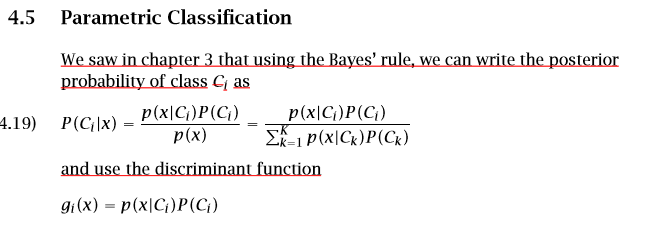

In [177]:
P1 = len(pos_data)/(len(pos_data)+len(neg_data))
P2 = len(neg_data)/(len(pos_data)+len(neg_data))

In [178]:
P1+P2

1.0

In [179]:
pima_data_train_X = pima_data_train.drop(['9'], axis=1)

In [180]:
pdf1_x = norm1.pdf(pima_data_train_X)*P1
pdf2_x = norm2.pdf(pima_data_train_X)*P2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

In [181]:
pred = post1>post2

In [182]:
labels = pima_data_train['9']
labels[labels=='pos'] = True
labels[labels=='neg'] = False

C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\swarn\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

 Training Error

In [183]:
(sum(labels == pred)/len(pred))*100

75.4

In [184]:
pima_data_test_X = pima_data_test.drop(['9'], axis=1)
pdf1_x = norm1.pdf(pima_data_test_X)*P1
pdf2_x = norm2.pdf(pima_data_test_X)*P2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

In [185]:
pred = post1>post2

In [186]:
labels = pima_data_test['9']
labels[labels=='pos'] = True
labels[labels=='neg'] = False

C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\swarn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Test error

In [187]:
(sum((labels == pred))/len(pred))*100

77.98507462686567

In [188]:
labels.shape

(268,)

In [189]:
pred.shape

(268,)

# Q2: Apply and evaluate linear discriminant analysis on the diabetes dataset. If the last digit
of your student number is:
(i) 0-3: Use a full but common/shared covariance matrix for each class.
(ii) 4-6: Use a diagonal common/shared covariance matrix for each class.
(iii) 7-9: Use a diagonal common/shared covariance matrix with equal variances for all
dimensions, for each class.
→ For Q2, you will need to pool the data to estimate the covariance matrix (see Alpaydin,
Sec.5.5 for how to do this).

In [235]:

cov1 = pos_data.cov()

cov2 = neg_data.cov()
cov_shared = cov1*P1+cov2*P2


# Nonparametric Density Estimation 
 Some of the techniques discussed in lectures are very widely used.  In this part of the prac we will experiment with: 
 
• Histograms: in Matlab as function hist().  Type “doc hist” for the appropriate entry in the very useful Matlab help documentation. 
• Kernel density estimation: also in Matlab – in the Help browser see “Statistics Toolbox -> Descriptive statistics -> Percentiles and Graphical Descriptions -> Probability Density Estimation”, and also “doc ksdensity”. 
 
→ Firstly we need some data.  Import the fourth attribute (petalwidth) from the Iris dataset used in an earlier prac into a matlab variable.  What follows assumes this data is stored in a vector called ‘iris’. 
 
# Q3: Read the matlab documentation for the hist function.  Produce a histogram of this data (with the default 10 bins) – 

hist(iris).  Experiment with different numbers of bins (e.g. 2,4,8,10,20,50,100,...), observe the result and make sure you understand what is happening.  What happens when the number of bins approaches (and becomes greater than) the number of data points? 
→ Read the matlab documentation for the ksdensity function.  Produce a kernel estimator of the iris data: o [f,x,h]=ksdensity(iris); o plot(x,f)
→ What is happening here is that matlab is using a Gaussian kernel, with width ‘h’ parameter chosen automatically (don’t worry too much about how).  What is returned are the density values (f) at 100 equally spaced points (x) in the range of the iris data.  Also, the value of u gives the value of the width parameter.   
 

In [224]:
iris_data = pandas.read_csv('iris.txt',header=None)


In [225]:

iris_data = iris_data[3]

In [226]:
iris_data

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: 3, Length: 150, dtype: float64

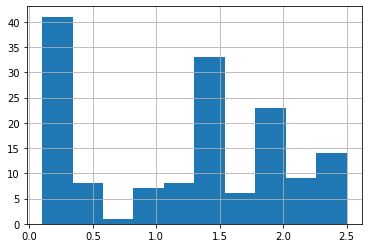

In [227]:
iris_data.hist(bins=10)

In [230]:
hist_bins = [2,4,8,10,50,100,150]

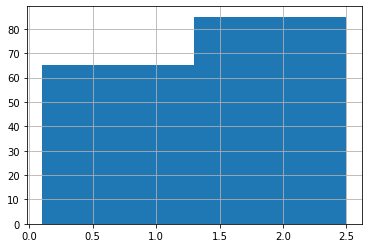

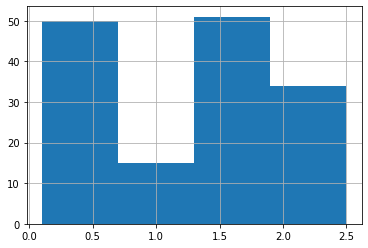

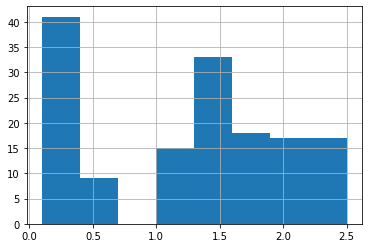

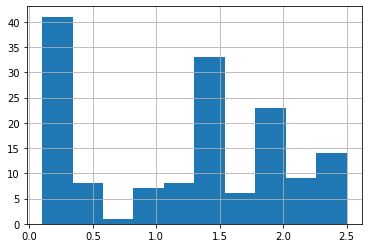

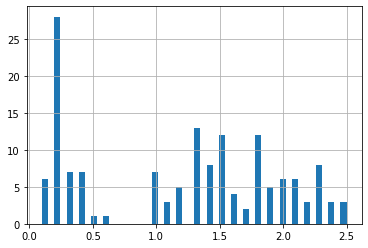

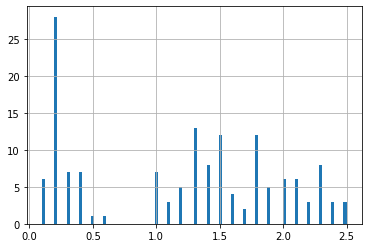

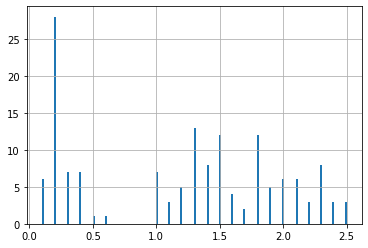

In [229]:
import matplotlib.pyplot as plt
for b in hist_bins:
    iris_data.hist(bins=b)
    plt.show()

In [236]:
from scipy import stats
from sklearn.neighbors import KernelDensity

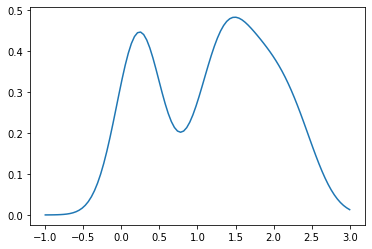

In [238]:
import numpy as np
x = np.linspace(-1,3,100)
plt.plot(x,stats.gaussian_kde(iris_data)(x))

In [241]:
kde = KernelDensity(kernel='gaussian',bandwidth=0.5).fit(np.array(iris_data).reshape((-1,1)))

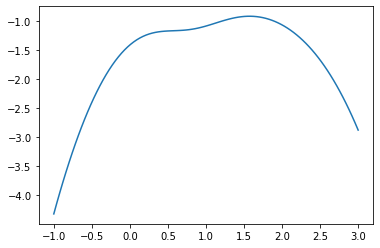

In [243]:
plt.plot(x,kde.score_samples(x.reshape(-1,1)))